In [2]:
import pyodbc
import pandas as pd

In [4]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=dev-mercury.database.windows.net;DATABASE=TEP;UID=astronaut;PWD=USA2019!')
cursor = cnxn.cursor()

cursor.execute("SELECT election_year,race,registered_voters,votes FROM table_voter_turnout_summary WHERE state_wide_flag = 1")
data = cursor.fetchall()
type(data)

list

In [10]:
df_data = pd.DataFrame((tuple(row) for row in data))
df_data.columns = ["election_year", "race", "registered_voters", "votes"]
df_data.head()

,election_year,race,registered_voters,votes
0,2018,Ballot Measure No. 1 - 17FSH2,571320,284891
1,2018,GOVERNOR/LT. GOVERNOR,571320,284891
2,2018,US REPRESENTATIVE,571851,285009
3,2016,Ballot Measure No. 1 ? 15PFVR,528166,316461
4,2016,Ballot Measure No. 2 - SJR2,528166,316461


In [23]:
df_turnout_by_year = df_data.groupby("election_year")["registered_voters", "votes"].apply(max)
df_turnout_by_year["turnout"] = df_turnout_by_year["votes"] / df_turnout_by_year["registered_voters"]
df_turnout_by_year.reset_index(inplace = True)
df_turnout_by_year["presidential"] = df_turnout_by_year["election_year"] % 4 == 0
df_turnout_by_year

,election_year,registered_voters,votes,turnout,presidential
0,2000,473648,287825,0.607677,True
1,2002,460855,232852,0.505261,False
2,2004,472160,309937,0.656424,True
3,2006,466258,238307,0.511105,False
4,2008,495731,327341,0.660320,True
5,2010,494876,258746,0.522850,False
6,2012,506432,301694,0.595725,True
7,2014,509011,285449,0.560791,False
8,2016,528671,321274,0.607701,True
9,2018,571851,285009,0.498397,False


In [25]:
import matplotlib.pyplot as plt

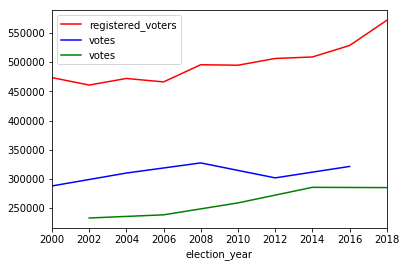

In [33]:
plt.clf()
ax = plt.gca()
df_turnout_by_year.plot(kind = "line", x = "election_year", y = "registered_voters", color = "red", ax = ax)
df_turnout_by_year.query("presidential == True").plot(kind = "line", x = "election_year", y = "votes", color = "blue", ax = ax)
df_turnout_by_year.query("presidential == False").plot(kind = "line", x = "election_year", y = "votes", color = "green", ax = ax)
plt.show()

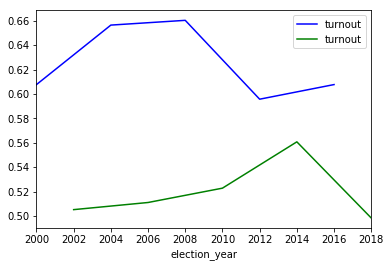

In [34]:
plt.clf()
ax = plt.gca()
df_turnout_by_year.query("presidential == True").plot(kind = "line", x = "election_year", y = "turnout", color = "blue", ax = ax)
df_turnout_by_year.query("presidential == False").plot(kind = "line", x = "election_year", y = "turnout", color = "green", ax = ax)
plt.show()

<Figure size 432x288 with 0 Axes>

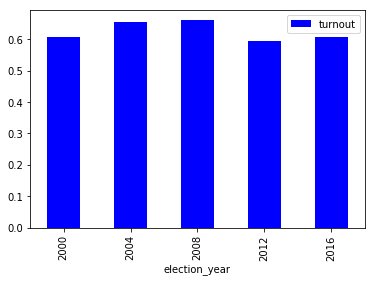

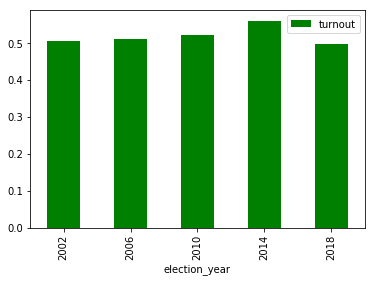

In [37]:
plt.clf()
df_turnout_by_year.query("presidential == True").plot(kind = "bar", x = "election_year", y = "turnout", color = "blue")
df_turnout_by_year.query("presidential == False").plot(kind = "bar", x = "election_year", y = "turnout", color = "green")
plt.show()

In [38]:
import numpy as np

In [42]:
np.correlate(df_turnout_by_year["presidential"],df_turnout_by_year["turnout"])

array([3.12784629])